In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'numpy'

In [ ]:
data=pd.read_csv('/kaggle/input/pakistans-largest-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv')
data

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [ ]:
data.shape

(1048575, 26)

In [ ]:
data.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

 **Since the last five column have non values so it drop**

In [ ]:
data = data.iloc[:, :-5]

**Drop null values**

In [ ]:
data=data.dropna(how='all')

**MV column name contain space so it creates problem so i the change column name**

In [ ]:
data.rename(columns={' MV ':'MV'},inplace=True)
data.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

**Data types conversion of some columns**

In [ ]:
data['item_id']=data['item_id'].astype(int)
data['Customer ID']=data['Customer ID'].astype(str)
data['qty_ordered']=data['qty_ordered'].astype(int)
data['Year']=data['Year'].astype(int)
data['Month']=data['Month'].astype(int)

**Change column name of category_name_1 to Category**

In [ ]:
data.rename(columns={'category_name_1':'Category'},inplace=True)
data.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'Category', 'sales_commission_code',
       'discount_amount', 'payment_method', 'Working Date', 'BI Status', 'MV',
       'Year', 'Month', 'Customer Since', 'M-Y', 'FY', 'Customer ID'],
      dtype='object')

# **Data Analysis**

**Analysis the top 10 selling Category and Visualize Using Barplot**

In [ ]:
Top10Category=data.groupby('Category')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False).head(10)
print(Top10Category)

             Category   count
9   Mobiles & Tablets  115710
8       Men's Fashion   92221
14    Women's Fashion   59721
0          Appliances   52413
13         Superstore   43613
1   Beauty & Grooming   41496
12            Soghaat   34011
10             Others   29218
6       Home & Living   26504
4       Entertainment   26326


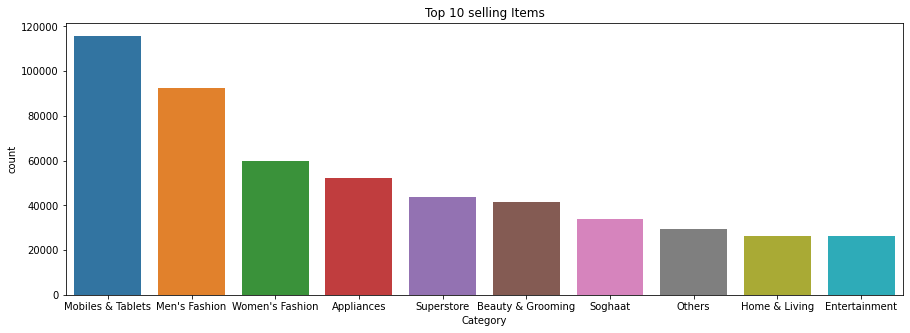

In [ ]:
plt.figure(figsize=(15,5))
graph=sns.barplot(x='Category',y='count',data=Top10Category)
graph.set_title('Top 10 selling Items')
plt.show()

**Analysis of order status**

In [ ]:
orderstatus=data.groupby('status')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False)
print(orderstatus)

            status   count
4         complete  233685
1         canceled  201249
14        received   77290
8   order_refunded   59529
15          refund    8050
3              cod    2859
9             paid    1159
2           closed     494
10  payment_review      57
11         pending      48
13      processing      33
7           holded      31
6            fraud      10
12  pending_paypal       7
0               \N       4
5         exchange       4


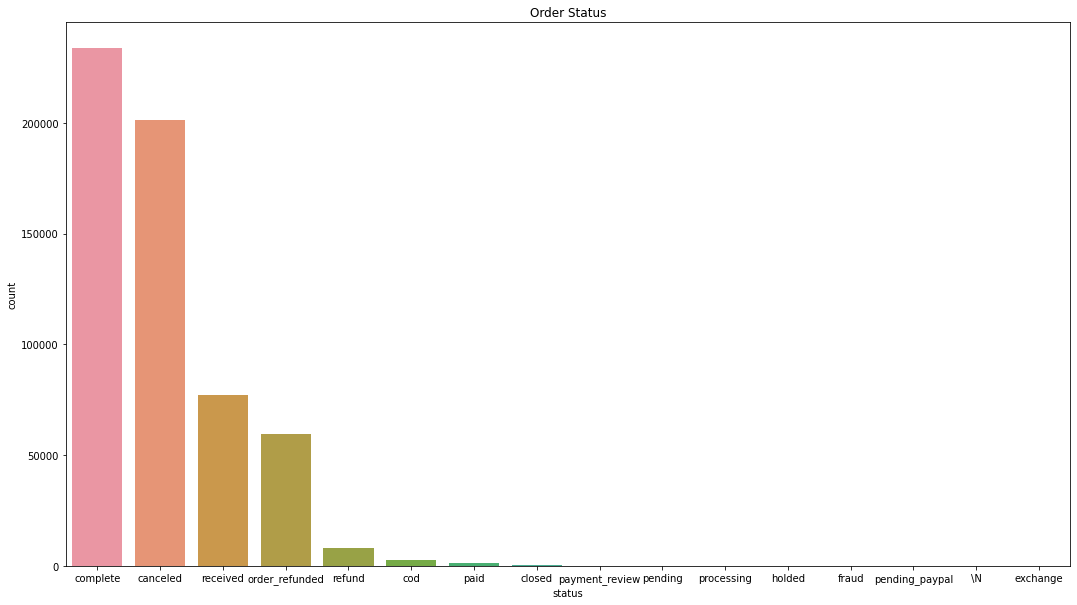

In [ ]:
plt.figure(figsize=(18,10))
graph=sns.barplot(x='status',y='count',data=orderstatus)
graph.set_title('Order Status')
plt.show()

**Analysis of Top Ten payment Method**

In [ ]:
paymethod=data.groupby('payment_method')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False).head(10)
print(paymethod)

     payment_method   count
6               cod  271960
2           Payaxis   97641
0           Easypay   82900
12       jazzwallet   35145
8   easypay_voucher   31176
4       bankalfalah   23065
11      jazzvoucher   15633
1        Easypay_MA   14028
7    customercredit    7555
3               apg    1758


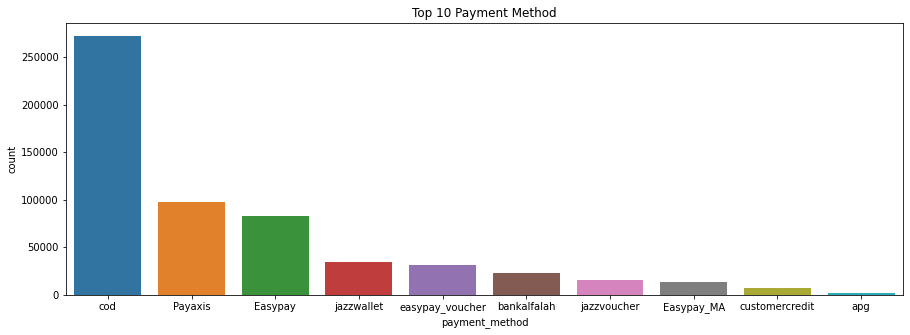

In [ ]:
plt.figure(figsize=(15,5))
graph=sns.barplot(x='payment_method',y='count',data=paymethod)
graph.set_title('Top 10 Payment Method')
plt.show()

**Analysis Category Grand Item In a Long Format**

In [ ]:
status=data.groupby(['Category','status'])['grand_total'].sum().reset_index()
graph=px.bar(status,x='Category',y='grand_total',color='status')
graph.show()

**Analysis the Grand of Item Category Wise**

In [ ]:
category=data.groupby(['Category'])['grand_total'].sum().reset_index()
graph=px.bar(category,x='Category',y='grand_total',text='grand_total')
graph.update_traces(texttemplate='%{text:.2s}', textposition='outside')
graph.show()

**Analysis Order Quantity of Item By Category**

In [ ]:
status=data.groupby(['Category','status'])['qty_ordered'].sum().reset_index()
graph=px.line(status,x='Category',y='qty_ordered',color='status')
graph.show()

**Analysis Quantity Ordered In a Long format Using Scatter Graph**

In [ ]:
no=data.groupby(['Year','Category','status'])['qty_ordered'].sum().reset_index()
px.scatter(no,x='Category',y='qty_ordered',color='status',size='qty_ordered',hover_data=['Category','status','Year'])